In [ ]:
import numpy as np
import matplotlib.pyplot as plt

frame_rate = 40000

# Position 4

In [119]:
position_nr = 4

# Load the relevant calibration file
calibration = np.load(f'data/calibration/pos{position_nr}.npy')

# Import displacements for pos4-2 through pos4-4
base_path = 'processed/pos' + str(position_nr) + '-'
displacements = [np.load(base_path + str(i) +'/displacements1.npy') for i in [2, 3, 4]]

# Replace any entries with a negative horizontal displacement with nan
for i, disp in enumerate(displacements):
    disp[disp[:, :, 0] < 0] = np.nan

# Calculate mean displacement per frame
mean_displacements = [np.nanmean(np.linalg.norm(disp, axis=2), axis=1) for disp in displacements]
flow_rate = [(disp / calibration[0] * frame_rate / 1000 * 0.01 * 0.02 * 1000) for disp in mean_displacements]

/var/folders/nt/rmh7rzx15n3_4wkj1k7rpbxw0000gn/T/ipykernel_18703/1850654692.py:15: RuntimeWarning: Mean of empty slice
  mean_displacements = [np.nanmean(np.linalg.norm(disp, axis=2), axis=1) for disp in displacements]


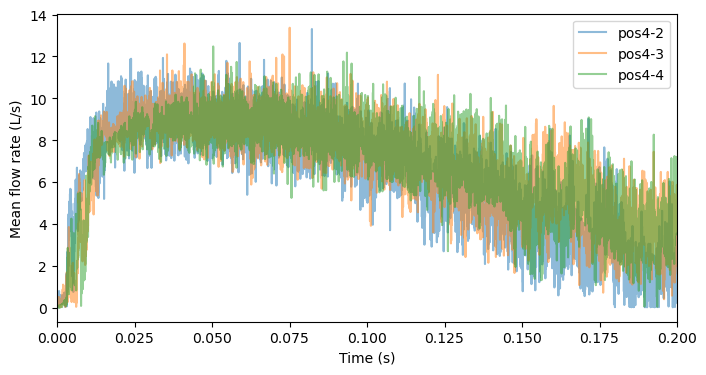

In [120]:
# Set a horizontal shift for each mean displacement
starts = np.array([1670, 7850, 0]) + 1150 # in frames

# Plot all displacements in one plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, flow_rate_pos in enumerate(flow_rate):
    x = (np.arange(len(flow_rate_pos)) - starts[i]) / frame_rate
    ax.plot(x, flow_rate_pos, label='pos' + str(position_nr) + '-' + str(i+2), alpha=0.5)

# ax.set_xlim(500, 5000)
ax.set_xlim(0, 0.2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Mean flow rate (L/s)')
ax.legend()
plt.show()

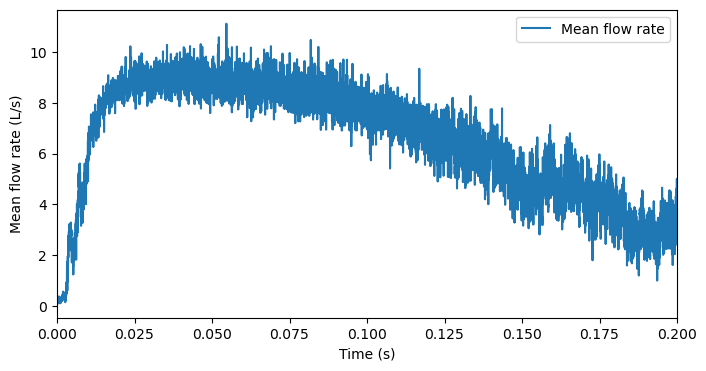

In [121]:
# Cut off the starts of the flow rates and make arrays equal length
flow_rate_cut = [flow_rate_pos[start:] for flow_rate_pos, start in zip(flow_rate, starts)]
min_length = min([len(flow_rate_pos) for flow_rate_pos in flow_rate_cut])
flow_rate_cut = [flow_rate_pos[:min_length] for flow_rate_pos in flow_rate_cut]

# Get the mean flow rate
mean_flow_rate = np.mean(flow_rate_cut, axis=0)

# Plot the mean flow rate
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
x = np.arange(len(mean_flow_rate)) / frame_rate
ax.plot(x, mean_flow_rate, label='Mean flow rate')
ax.set_xlim(0, 0.2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Mean flow rate (L/s)')
ax.legend()


# Position 3

In [138]:
position_nr = 3

# Load the relevant calibration file
calibration = np.load(f'data/calibration/pos{position_nr}.npy')

# Import displacements for pos4-2 through pos4-4
base_path = 'processed/pos' + str(position_nr) + '-'
displacements_orig = [np.load(base_path + str(i) +'/displacements1.npy') for i in [1, 2, 3]]
displacements = [disp.copy() for disp in displacements_orig]

# Replace any entries with a negative horizontal displacement with nan
for i, disp in enumerate(displacements):
    disp[disp[:, :, 0] < 0] = np.nan

# Calculate mean displacement per frame
mean_displacements = [np.nanmean(np.linalg.norm(disp, axis=2), axis=1) for disp in displacements]
flow_rate = [(disp / calibration[0] * frame_rate / 1000 * 0.01 * 0.02 * 1000) for disp in mean_displacements]

/var/folders/nt/rmh7rzx15n3_4wkj1k7rpbxw0000gn/T/ipykernel_18703/4021817669.py:16: RuntimeWarning: Mean of empty slice
  mean_displacements = [np.nanmean(np.linalg.norm(disp, axis=2), axis=1) for disp in displacements]


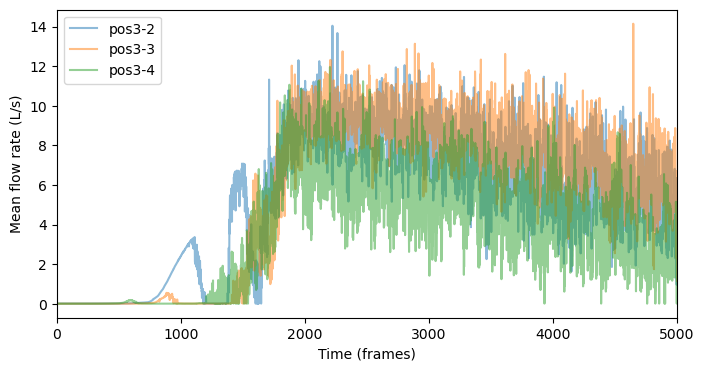

In [137]:
# Set a horizontal shift for each mean displacement
starts = np.array([3000, 2000, 0]) +10000 # in frames

# Plot all displacements in one plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, flow_rate_pos in enumerate(flow_rate):
    x = (np.arange(len(flow_rate_pos)) - starts[i]) / frame_rate
    x = np.arange(len(flow_rate_pos)) - starts[i]
    ax.plot(x, flow_rate_pos, label='pos' + str(position_nr) + '-' + str(i+2), alpha=0.5)

ax.set_xlim(0, 5000)
# ax.set_xlim(0, 0.2)
ax.set_xlabel('Time (frames)')
ax.set_ylabel('Mean flow rate (L/s)')
ax.legend()
plt.show()

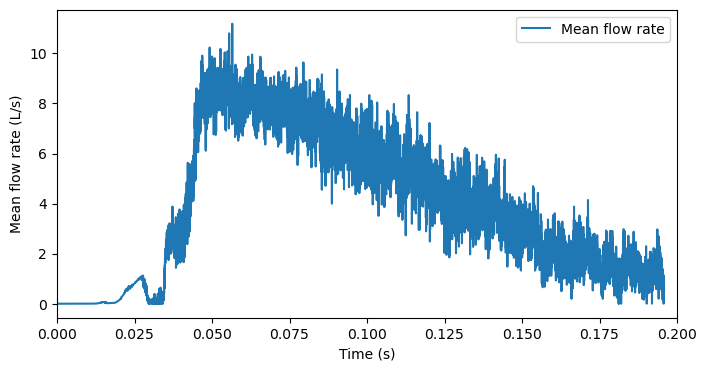

In [132]:
# Cut off the starts of the flow rates and make arrays equal length
flow_rate_cut = [flow_rate_pos[start:] for flow_rate_pos, start in zip(flow_rate, starts)]
min_length = min([len(flow_rate_pos) for flow_rate_pos in flow_rate_cut])
flow_rate_cut = [flow_rate_pos[:min_length] for flow_rate_pos in flow_rate_cut]

# Get the mean flow rate
mean_flow_rate = np.mean(flow_rate_cut, axis=0)

# Plot the mean flow rate
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
x = np.arange(len(mean_flow_rate)) / frame_rate
ax.plot(x, mean_flow_rate, label='Mean flow rate')
ax.set_xlim(0, 0.2)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Mean flow rate (L/s)')
ax.legend()